In [204]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.circuit.library.standard_gates import HGate
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi, acos
import numpy as np

# Product States

A product state is a state of the system in which qubits are not entangled with eachother. As a simple example consider the following circuit.

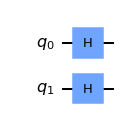

In [205]:
qc = QuantumCircuit(2,)
qc.h(0)
qc.h(1)
qc.draw()

This circuit contains two qubits, we can use a tensor product to write the combined state as a single vector.
Let us write the state for the above circuit. We see that the circuit is in the $\ket{++}$ state. Thus, the system is in the state,
$$\ket{\Psi} = \ket{++} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\otimes \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$
$$=\frac{1}{2}(\ket{00} + \ket{01}+ \ket{10} + \ket{11})$$

Such a state is called a product state. We see that in such a state, the qubits are independant of eachother or in other words, measuring one does not tell us anything about the state of the other.

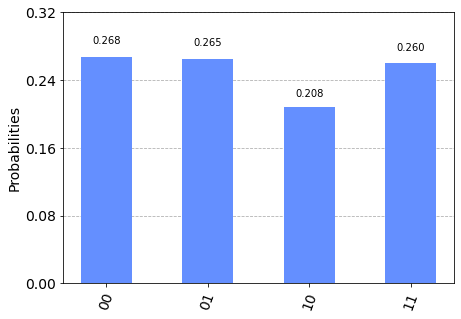

In [206]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

# Entangled states

On the other hand we have states in which qubits are correlated with eachother, these states are called entangled states. The strength of this correlation can vary. One state in which the qubits are maximally entangled is the GHZ state.

## Greenberger–Horne–Zeilinger (GHZ) state

Similar to $\Phi ^+$ state for two qubits, we can have a state for 3 or more qubits. The state is given as follows.

$$\ket{\Psi} = \frac{1}{\sqrt{2}}(\ket{000} + \ket{111})$$

Let's implement it.

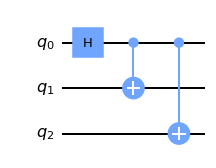

In [207]:
qc = QuantumCircuit(3,)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

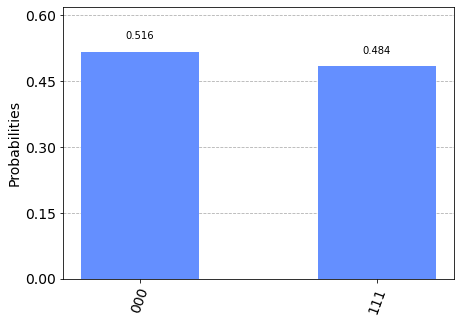

In [208]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

In [209]:
print(counts)

{'000': 528, '111': 496}


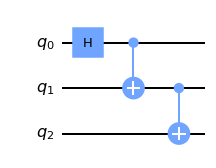

In [210]:
qc = QuantumCircuit(3,)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw()

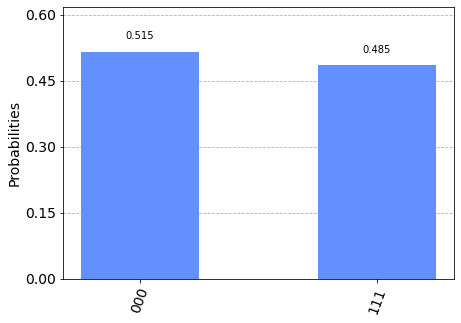

In [211]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

The state can also be define for N qubits as follows.

$$\ket{\Psi} = \frac{1}{\sqrt{2}}(\ket{0} ^{\otimes N} + \ket{1} ^{\otimes N})$$

Let us implement a GHZ state with 20 qubits.

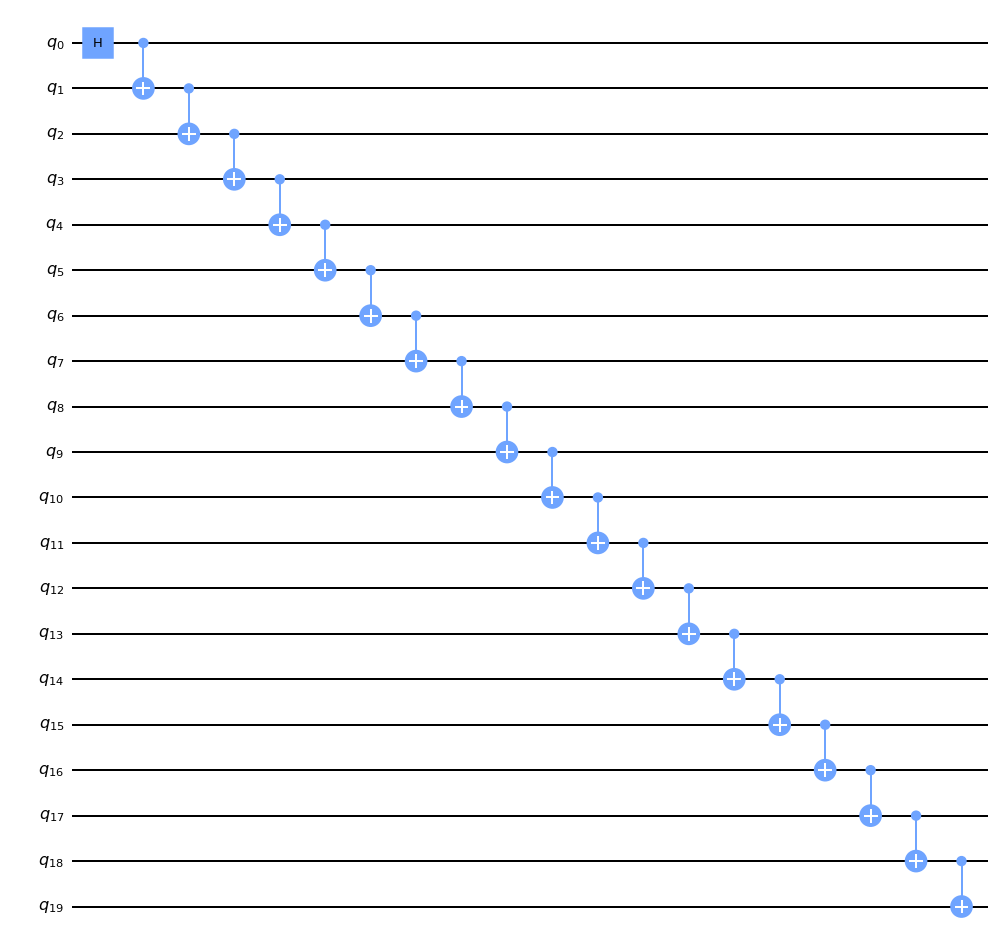

In [212]:
n = 20
qc = QuantumCircuit(n,)
qc.h(0)
for i in range(1,n):
    qc.cx(i-1,i)
qc.draw()

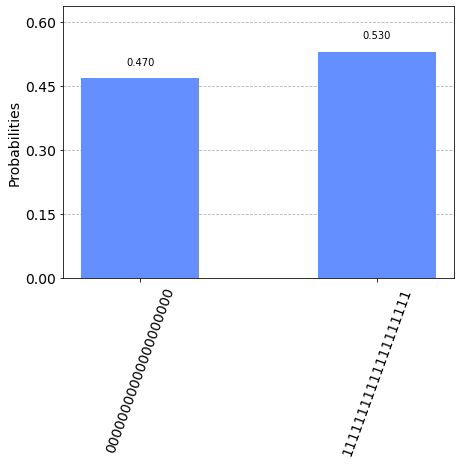

In [213]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

GHZ state is a maximally entangled state and a measurement on one qubit destroys the entanglement between all qubits.

In [214]:
qc = QuantumCircuit(3,1)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

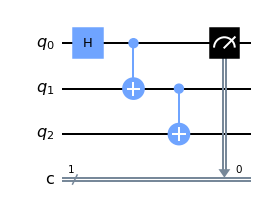

In [215]:
qc.measure(0,0) # we measure only one qubit
qc.draw()

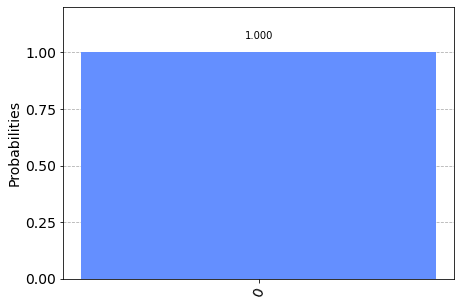

In [216]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_histogram(counts)

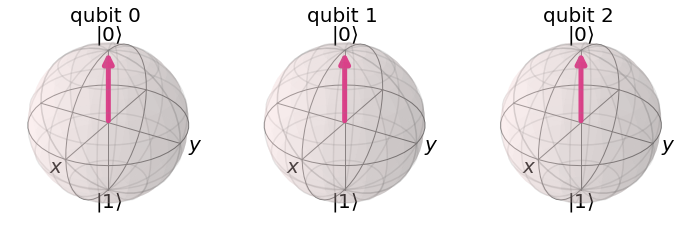

In [217]:
plot_bloch_multivector(state1)

## W state

The GHZ state is maximally entangled but there are other states in which the correlations are not as strong. One such example is the W state, which is written as:
$$\ket{\Psi} = \frac{1}{\sqrt{3}}(\ket{001} + \ket{010} + \ket{100})$$

This is an entangled state as well (we cannot write it as a tensor product of single qubit states) but it is not maximally entangled. Measuring one qubit sometimes tells us all the information about the system and sometimes it does not, let us see that happening.

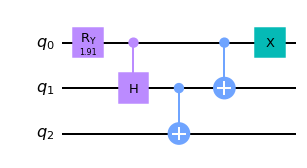

In [218]:
qc = QuantumCircuit(3,)
angle = 2*acos(1/sqrt(3))
qc.ry(angle,0)
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)
qc.draw()


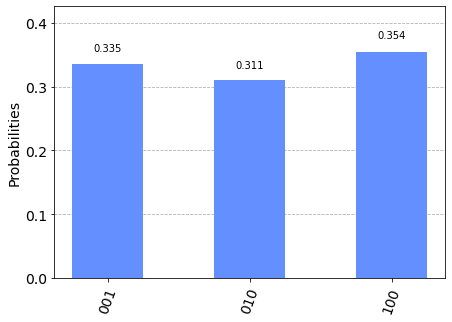

In [219]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts)

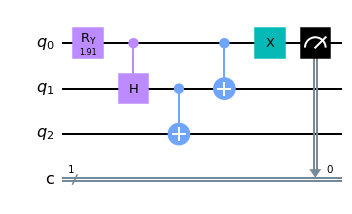

In [226]:
qc = QuantumCircuit(3,1)
angle = 2*acos(1/sqrt(3))
qc.ry(angle,0)
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)
qc.measure(0,0) # we measure only one qubit
qc.draw()

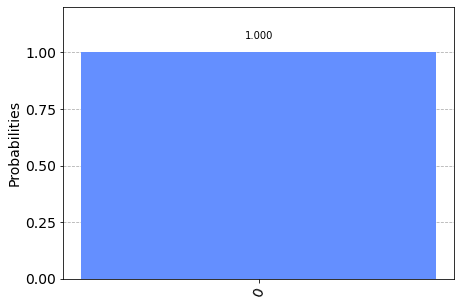

In [227]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_histogram(counts)

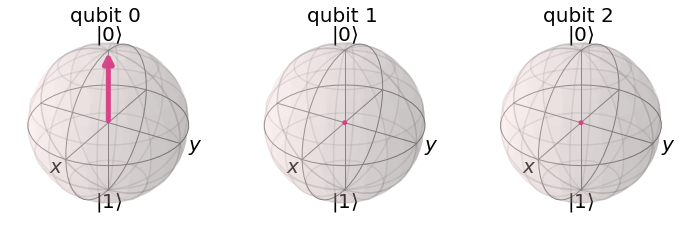

In [228]:
plot_bloch_multivector(state1)

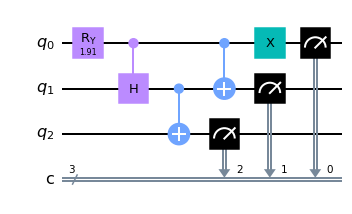

In [232]:
qc = QuantumCircuit(3,3)
angle = 2*acos(1/sqrt(3))
qc.ry(angle,0)
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

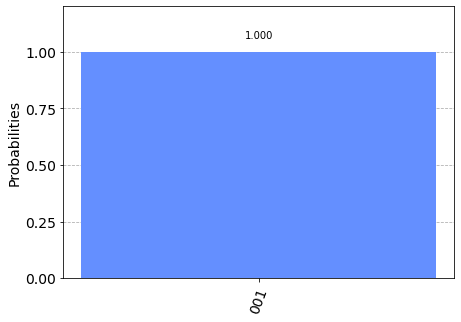

In [233]:
backend = Aer.get_backend("statevector_simulator") # we choose the simulator as our backend
result = execute(qc, backend, shots = 1).result()
counts = result.get_counts() # we run the simulation and get the counts
state1 = result.get_statevector()
plot_histogram(counts)

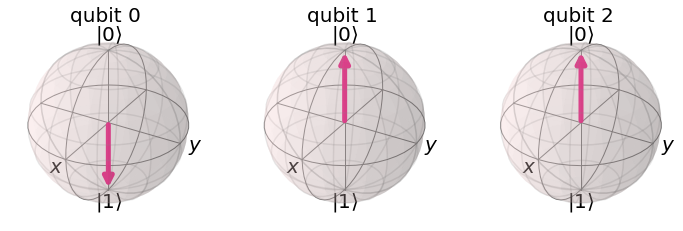

In [234]:
plot_bloch_multivector(state1)